# Setting up

In [1]:
import primer3
import pandas as pd
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.Restriction import *
from primers import create
from primers import score
from Bio.SeqUtils import gc_fraction
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.SeqUtils import MeltingTemp as mt
from functions import *
import io
import matplotlib.pyplot as plt
import requests
import biotite
import biotite.sequence.graphics as graphics
import biotite.sequence.io.genbank as gb
from Bio.SeqFeature import SeqFeature, FeatureLocation
from dna_features_viewer import GraphicFeature, GraphicRecord

In [2]:
seq = Seq("CATCATAACGGTTCTGGCAAATATTCTGAAATGAGCTGTTGACAATTAATCATCGGCTCGTATAATGTGTGGAATTGTGAGCGGATAACAATTTCACACAGGAGATATCATATGAAGCTTCTCGAGAATTCCCGGGTACCAGATCTGTCGACTACAAGGACGATGACGACAAGTGAAGATCGATCTCTCGATCGAGTGAGAGAAGATTTTCAGCCTGATACAGATTAAATCAGAACGCAGAAGCGGTCTGATAAAACAGAATTTGCCTGGCGGCAGTAGCGCGGTGGTCCCACCTGACCCCATGCCGAACTCAGAAGTGAAACGCCGTAGCGCCGATGGTAGTGTGGGGTCTCCCCATGCGAGAGTAGGGAACTGCCAGGCATCAAATAAAACGAAAGGCTCAGTCGAAAGACTGGGCCTTTCGTTTTATCTGTTGTTTGTCGGTGAACGCTCTCCTGAGTAGGACAAATCCGCCGGGAGCGGATTTGAACGTTGCGAAGCAACGGCCCGGAGGGTGGCGGGCAGGACGCCCGCCATAAACTGCCAGGCATCAAATTAAGCAGAAGGCCATCCTGACGGATGGCCTTTTTGCGTTTCTACAAACTCTTTTGTTTATTTTTCTAAATACATTCAAATATGTATCCGCTCATGAGACAATAACCCTGATAAATGCTTCAATAATATTGAAAAAGGAAGAGTATGAGTATTCAACATTTCCGTGTCGCCCTTATTCCCTTTTTTGCGGCATTTTGCCTTCCTGTTTTTGCTCACCCAGAAACGCTGGTGAAAGTAAAAGATGCTGAAGATCAGTTGGGTGCACGAGTGGGTTACATCGAACTGGATCTCAACAGCGGTAAGATCCTTGAGAGTTTTCGCCCCGAAGAACGTTTTCCAATGATGAGCACTTTTAAAGTTCTGCTATGTGGCGCGGTATTATCCCGTGTTGACGCCGGGCAAGAGCAACTCGGTCGCCGCATACACTATTCTCAGAATGACTTGGTTGAGTACTCACCAGTCACAGAAAAGCATCTTACGGATGGCATGACAGTAAGAGAATTATGCAGTGCTGCCATAACCATGAGTGATAACACTGCGGCCAACTTACTTCTGACAACGATCGGAGGACCGAAGGAGCTAACCGCTTTTTTGCACAACATGGGGGATCATGTAACTCGCCTTGATCGTTGGGAACCGGAGCTGAATGAAGCCATACCAAACGACGAGCGTGACACCACGATGCCTGTAGCAATGGCAACAACGTTGCGCAAACTATTAACTGGCGAACTACTTACTCTAGCTTCCCGGCAACAATTAATAGACTGGATGGAGGCGGATAAAGTTGCAGGACCACTTCTGCGCTCGGCCCTTCCGGCTGGCTGGTTTATTGCTGATAAATCTGGAGCCGGTGAGCGTGGGTCTCGCGGTATCATTGCAGCACTGGGGCCAGATGGTAAGCCCTCCCGTATCGTAGTTATCTACACGACGGGGAGTCAGGCAACTATGGATGAACGAAATAGACAGATCGCTGAGATAGGTGCCTCACTGATTAAGCATTGGTAACTGTCAGACCAAGTTTACTCATATATACTTTAGATTGATTTAAAACTTCATTTTTAATTTAAAAGGATCTAGGTGAAGATCCTTTTTGATAATCTCATGACCAAAATCCCTTAACGTGAGTTTTCGTTCCACTGAGCGTCAGACCCCGTAGAAAAGATCAAAGGATCTTCTTGAGATCCTTTTTTTCTGCGCGTAATCTGCTGCTTGCAAACAAAAAAACCACCGCTACCAGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCAAATACTGTCCTTCTAGTGTAGCCGTAGTTAGGCCACCACTTCAAGAACTCTGTAGCACCGCCTACATACCTCGCTCTGCTAATCCTGTTACCAGTGGCTGCTGCCAGTGGCGATAAGTCGTGTCTTACCGGGTTGGACTCAAGACGATAGTTACCGGATAAGGCGCAGCGGTCGGGCTGAACGGGGGGTTCGTGCACACAGCCCAGCTTGGAGCGAACGACCTACACCGAACTGAGATACCTACAGCGTGAGCTATGAGAAAGCGCCACGCTTCCCGAAGGGAGAAAGGCGGACAGGTATCCGGTAAGCGGCAGGGTCGGAACAGGAGAGCGCACGAGGGAGCTTCCAGGGGGAAACGCCTGGTATCTTTATAGTCCTGTCGGGTTTCGCCACCTCTGACTTGAGCGTCGATTTTTGTGATGCTCGTCAGGGGGGCGGAGCCTATGGAAAAACGCCAGCAACGCGGCCTTTTTACGGTTCCTGGCCTTTTGCTGGCCTTTTGCTCACATGTTCTTTCCTGCGTTATCCCCTGATTCTGTGGATAACCGTATTACCGCCTTTGAGTGAGCTGATACCGCTCGCCGCAGCCGAACGACCGAGCGCAGCGAGTCAGTGAGCGAGGAAGCGGAAGAGCGCCTGATGCGGTATTTTCTCCTTACGCATCTGTGCGGTATTTCACACCGCATACAGATCCTGACGCGCCCTGTAGCGGCGCATTAAGCGCGGCGGGTGTGGTGGTTACGCGCAGCGTGACCGCTACACTTGCCAGCGCCCTAGCGCCCGCTCCTTTCGCTTTCTTCCCTTCCTTTCTCGCCACGTTCGCCGGCTTTCCCCGTCAAGCTCTAAATCGGGGGCTCCCTTTAGGGTTCCGATTTAGTGCTTTACGGCACCTCGACCCCAAAAAACTTGATTAGGGTGATGGTTCACGTAGTGGGCCATCGCCCTGATAGACGGTTTTTCGCCCTTTGACGTTGGAGTCCACGTTCTTTAATAGTGGACTCTTGTTCCAAACTGGAACAACACTCAACCCTATCTCGGTCTATTCTTTTGATTTATAAGGGATTTTGCCGATTTCGGCCTATTGGTTAAAAAATGAGCTGATTTAACAAAAATTTAACGCGAATTTTAACAAAATATTAACGTTTACAGGATCTGTATGGTGCACTCTCAGTACAATCTGCTCTGATGCCGCATAGTTAAGCCAGTATACACTCCGCTATCGCTACGTGACTGCCTCGACCTGCAGCAATTCCAACGCCATCAAAAATAATTCGCGTCTGGCCTTCCTGTAGCCAGCTTTCATCAACATTAAATGTGAGCGAGTAACAACCCGTCGGATTCTCCGTGGGAACAAACGGCGGATTGACCGTAATGGGATAGGTCACGTTGGTGTAGATGGGCGCATCGTAACCGTGCATCTGCCAGTTTGAGGGGACGACGACAGTATCGGCCTCAGGAAGATCGCACTCCAGCCAGCTTTCCGGCACCGCTTCTGGTGCCGGAAACCAGGCAAAGCGCCATTCGCCATTCAGGCTGCGCAACTGTTGGGAAGGGCGATCGGTGCGGGCCTCTTCGCTATTACGCCAGCTGGCGAAAGGGGGATGTGCTGCAAGGCGATTAAGTTGGGTAACGCCAGGGTTTTCCCAGTCACGACGTTGTAAAACGACGGCCAGTGAATCCGTAATCATGGTCATAGCTGTTTCCTGTGTGAAATTGTTATCCGCTCACAATTCCACACAACATACGAGCCGGAAGCATAAAGTGTAAAGCCTGGGGTGCCTAATGAGTGAGCTAACTTACATTAATTGCGTTGCGCTCACTGCCCGCTTTCCAGTCGGGAAACCTGTCGTGCCAGCTGCATTAATGAATCGGCCAACGCGCGGGGAGAGGCGGTTTGCGTATTGGGCGCCAGGGTGGTTTTTCTTTTCACCAGTGAGACGGGCAACAGCTGATTGCCCTTCACCGCCTGGCCCTGAGAGAGTTGCAGCAAGCGGTCCACGCTGGTTTGCCCCAGCAGGCGAAAATCCTGTTTGATGGTGGTTAACGGCGGGATATAACATGAGCTGTCTTCGGTATCGTCGTATCCCACTACCGAGATATCCGCACCAACGCGCAGCCCGGACTCGGTAATGGCGCGCATTGCGCCCAGCGCCATCTGATCGTTGGCAACCAGCATCGCAGTGGGAACGATGCCCTCATTCAGCATTTGCATGGTTTGTTGAAAACCGGACATGGCACTCCAGTCGCCTTCCCGTTCCGCTATCGGCTGAATTTGATTGCGAGTGAGATATTTATGCCAGCCAGCCAGACGCAGACGCGCCGAGACAGAACTTAATGGGCCCGCTAACAGCGCGATTTGCTGGTGACCCAATGCGACCAGATGCTCCACGCCCAGTCGCGTACCGTCTTCATGGGAGAAAATAATACTGTTGATGGGTGTCTGGTCAGAGACATCAAGAAATAACGCCGGAACATTAGTGCAGGCAGCTTCCACAGCAATGGCATCCTGGTCATCCAGCGGATAGTTAATGATCAGCCCACTGACGCGTTGCGCGAGAAGATTGTGCACCGCCGCTTTACAGGCTTCGACGCCGCTTCGTTCTACCATCGACACCACCACGCTGGCACCCAGTTGATCGGCGCGAGATTTAATCGCCGCGACAATTTGCGACGGCGCGTGCAGGGCCAGACTGGAGGTGGCAACGCCAATCAGCAACGACTGTTTGCCCGCCAGTTGTTGTGCCACGCGGTTGGGAATGTAATTCAGCTCCGCCATCGCCGCTTCCACTTTTTCCCGCGTTTTCGCAGAAACGTGGCTGGCCTGGTTCACCACGCGGGAAACGGTCTGATAAGAGACACCGGCATACTCTGCGACATCGTATAACGTTACTGGTTTCACATTCACCACCCTGAATTGACTCTCTTCCGGGCGCTATCATGCCATACCGCGAAAGGTTTTGCACCATTCCATGGTGTCGGAATTGCTGCAGGTCGAGGGGGTCATGGCTGCGCCCCGACACCCGCCAACACCCGCTGACGCGCCCTGACGGGCTTGTCTGCTCCCGGCATCCGCTTACAGACAAGCTGTGACCGTCTCCGGGAGCTGCATGTGTCAGAGGTTTTCACCGTCATCACCGAAACGCGCGAGGCAGGATGGCGCCCAACAGTCCCCCGGCCACGGGGCCTGCCACCATACCCACGCCGAAACAAGCGCTCATGAGCCCGAAGTGGCGAGCCCGATCTTCCCCATCGGTGATGTCGGCGATATAGGCGCCAGCAACCGCACCTGTGGCGCCGGTGATGCCGGCCACGATGCGTCCGGCGTAGAGGATCCGGGCTTATCGACTGCACGGTGCACCAATGCTTCTGGCGTCAGGCAGCCATCGGAAGCTGTGGTATGGCTGTGCAGGTCGTAAATCACTGCATAATTCGTGTCGCTCAAGGCGCACTCCCGTTCTGGATAATGTTTTTTGCGCCGA")

mcs_enzymes = RestrictionBatch(['HindIII', 'XhoI', 'EcoRI', 'XmaI', 'SmaI', 'Asp718I', 'KpnI', 'BglII', 'SalI'])
mcs_start_coord = 114
FLAG_start_coord = 149

padding = {
    HindIII: [3, 4, 5], 
    XhoI: [2, 3, 4, 5], 
    EcoRI: [1, 2, 3, 4, 5],
    XmaI: [1, 2, 3, 4, 5], #NA
    SmaI: [1, 2, 3, 4, 5], 
    Asp718I: [1, 2, 3, 4, 5], #NA
    KpnI: [1, 2, 3, 4, 5], 
    BglII: [2, 3, 4, 5], 
    SalI: [1, 2, 3, 4, 5]  
}
padding_seq = Seq("GATCA")

In [3]:
class InsertionOption:
    
    def __init__(self, enzyme5, enzyme3):
        self.enzyme5 = enzyme5
        self.enzyme3 = enzyme3
        self.start2site = seq[mcs_start_coord:get_site_start_coord(self.enzyme5, seq)]
        self.start2insertion = seq[mcs_start_coord:get_site_end_coord(self.enzyme5, seq)+1]
        self.site2FLAG = seq[get_site_end_coord(self.enzyme3,seq)+1:FLAG_start_coord]
        self.insertion2FLAG = seq[get_site_start_coord(self.enzyme3, seq):FLAG_start_coord]

    def check_frame_shift(self):
        if len(self.start2insertion)%3 != 0:
            partial_codon = self.start2insertion[-(len(self.start2insertion) % 3):]
            full_codon = select_codon(partial_codon,
                        insertion[:3].translate())
            self.start2insertion = self.start2insertion[:-(len(self.start2insertion) % 3)] + full_codon
        
        if len(self.insertion2FLAG)%3 != 0:
            partial_codon = self.insertion2FLAG[:len(self.insertion2FLAG) % 3]
            full_codon = select_codon(partial_codon,
                        insertion[-3:].translate(), ############################## add stop codon check later
                        reverse=True)
            self.insertion2FLAG = full_codon + self.insertion2FLAG[len(self.insertion2FLAG) % 3:]

    def generate_primers(self): ####################### check forward reverse
        padding5 = padding_seq[:padding[self.enzyme5][0]] #using minimal efficients padding
        padding3 = padding_seq[:padding[self.enzyme3][0]]
        
        overlap_forward, overlap_reverse = create(insertion)
        self.forward = overlap_forward.seq
        self.reverse = overlap_reverse.seq

        self.full_forward = Seq(padding5 + self.start2insertion + overlap_forward.seq)
        self.full_reverse = Seq(overlap_reverse.seq + self.insertion2FLAG + padding3)

        full_forward_hairpin = primer3.calc_hairpin(str(self.full_forward))
        full_reverse_hairpin = primer3.calc_hairpin(str(self.full_reverse))
        self.hairpin_presence_full_forward = full_forward_hairpin.structure_found
        self.hairpin_presence_full_reverse = full_reverse_hairpin.structure_found
        self.hairpin_tm_full_forward = full_forward_hairpin.tm
        self.hairpin_tm_full_reverse = full_reverse_hairpin.tm

        full_forward_homodimer = primer3.calc_homodimer(str(self.full_forward))
        full_reverse_homodimer = primer3.calc_homodimer(str(self.full_reverse))
        self.homodimer_presence_full_forward = full_forward_homodimer.structure_found
        self.homodimer_presence_full_reverse = full_reverse_homodimer.structure_found
        self.homodimer_tm_full_forward = full_forward_homodimer.tm
        self.homodimer_tm_full_reverse = full_reverse_homodimer.tm

        full_heterodimer = primer3.calc_heterodimer(str(self.full_forward), str(self.full_reverse))
        self.heterodimer_presence = full_heterodimer.structure_found
        self.heterodimer_tm = full_heterodimer.tm
        
        # Calculating GC-contents
        self.gc_forward = gc_fraction(overlap_forward.seq)
        self.gc_reverse = gc_fraction(overlap_reverse.seq)
        
        self.gc_total_forward = gc_fraction(self.full_forward)
        self.gc_total_reverse = gc_fraction(self.full_reverse)

        # Calculating melting temperatures
        self.tm_forward = mt.Tm_NN(overlap_forward.seq, Tris=65, Mg=2)
        self.tm_reverse = mt.Tm_NN(overlap_reverse.seq, Tris=65, Mg=2)
        
        self.tm_total_forward = mt.Tm_NN(self.full_forward, Tris=65, Mg=2)
        self.tm_total_reverse = mt.Tm_NN(self.full_reverse, Tris=65, Mg=2)

        self.tm_difference = abs(self.tm_forward - self.tm_reverse)
        self.tm_total_difference = abs(self.tm_total_forward - self.tm_total_reverse)

class Insertion:

    def __init__(self, enzyme_pairs):
        insertion_options = []
        for pair in enzyme_pairs:
            insertion_option = InsertionOption(pair[0], pair[1])
            insertion_option.check_frame_shift()
            insertion_option.generate_primers()
            insertion_options.append(insertion_option)
        self.insertion_options = insertion_options

    def create_dataframe(self):
        data = []
        for insertion_option in self.insertion_options:
            row = {
                'Enzyme (forward)': insertion_option.enzyme5,
                'Enzyme (reverse)': insertion_option.enzyme3, 
                'Start to insertion': len(insertion_option.start2insertion),
                'Insertion to FLAG': len(insertion_option.insertion2FLAG), 
                'Additional AAs': (len(insertion_option.start2insertion) + len(insertion_option.insertion2FLAG)) // 3,
                'Hairpin Tm (full forward)': insertion_option.hairpin_tm_full_forward,
                'Hairpin Tm (full reverse)': insertion_option.hairpin_tm_full_reverse,
                'Homodimer Tm (full forward)': insertion_option.homodimer_tm_full_forward,
                'Homodimer Tm (full reverse)': insertion_option.homodimer_tm_full_reverse,
                'Heterodimer Tm': insertion_option.heterodimer_tm,
                'GC-content (forward)': insertion_option.gc_forward, 
                'GC-content (reverse)': insertion_option.gc_reverse, 
                'Total GC-content (forward)': insertion_option.gc_total_forward, 
                'Total GC-content (reverse)': insertion_option.gc_total_reverse, 
                'Tm (forward)': insertion_option.tm_forward, 
                'Tm (reverse)': insertion_option.tm_reverse, 
                'Tm total (forward)': insertion_option.tm_total_forward, 
                'Tm total (reverse)': insertion_option.tm_total_reverse, 
                'Tm difference': insertion_option.tm_difference, 
                'Tm total difference': insertion_option.tm_total_difference
            }
            data.append(row)
        
        self.df = pd.DataFrame(data)


    def filter_dataframe(self):
        self.df = self.df[
            (self.df['Hairpin Tm (full forward)'] < self.df[['Tm (forward)', 'Tm (reverse)']].min(axis=1)) & 
            (self.df['Hairpin Tm (full reverse)'] < self.df[['Tm (forward)', 'Tm (reverse)']].min(axis=1)) &
            (self.df['Homodimer Tm (full forward)'] < self.df[['Tm (forward)', 'Tm (reverse)']].min(axis=1)) &
            (self.df['Homodimer Tm (full reverse)'] < self.df[['Tm (forward)', 'Tm (reverse)']].min(axis=1)) &
            (self.df['Heterodimer Tm'] < self.df[['Tm (forward)', 'Tm (reverse)']].min(axis=1))
        ]

    def choose_insertion_option(self):
        best_index = self.df.sort_values(by = ['Tm total difference'])[:5].sort_values(by = ['Additional AAs']).iloc[0,].name
        best_option = self.insertion_options[best_index]
        print(self.df.iloc[best_index,])
        return best_option

In [4]:
def adjust_genbank_for_insertion(input_file, output_file, insertion_pos, insertion_length):
    record = SeqIO.read(input_file, "genbank")
    for feature in record.features:
        
        if feature.location.end < insertion_pos - 1:
            continue
        if feature.location.start < insertion_pos - 1 < feature.location.end:
            new_start = feature.location.start
            new_end = feature.location.end + insertion_length
        else:
            new_start = feature.location.start + insertion_length
            new_end = feature.location.end + insertion_length

        feature.location = FeatureLocation(
            new_start,
            new_end,
            strand=feature.location.strand
        )

    insert_feature = SeqFeature(
            location=FeatureLocation(
                insertion_pos,
                insertion_pos + insertion_length,
                strand=1),
            type="CDS",
            qualifiers={"label": "insertion"})
    record.features.append(insert_feature)
    
    SeqIO.write(record, output_file, "genbank")

def custom_feature_formatter(feature):
    label = feature.qual.get("label")
    if feature.key == "promoter":
        return True, biotite.colors["dimgreen"], "black", label
    elif feature.key == "terminator":
        return True, "firebrick", "black", label
    elif feature.key == "protein_bind":
        return False, biotite.colors["lightgreen"], "black", label
    elif feature.key == "RBS":
        return False, biotite.colors["brightorange"], "black", label
    elif feature.key == "CDS":
        return True, biotite.colors["orange"], "black", label
    elif feature.key == "rep_origin":
        return True, "lightgray", "black", label
    elif feature.key == "primer_bind":
        return True, "blue", "black", label
    elif feature.key == "insertion":
        return True, "yellow", "black", label

# Provide options

In [5]:
insertion = Seq("CTGCAGAAGGAAAAGGAAATCAGCGAGGACGAAGAGCGCCGCGCCGGCGACGACGTGCAGAAGCTGACCGACAAGTTCATCGGTGAGATCGAGAAGGCACTGGAAGCCAAAGAAGCGGACCTCATGGCTGTCTGAGGCCGGGCTGACGTCATGGAAAAGACCCGGAAGGATGTGTGCGTGCCACGCCACGTGCCATTATCATGGACGGTAACAATCGCTGGGCGAAGAAGCGTCTTCTGCCCGGCGTCGCGCCACAAGGCCGGTGTCGATGCCGTCAGGGCGGTGATCGAGGTCTGCGCCGAGGCAGGGGTCGAGGTCCTCACCCTGTTCGCGTTCTCCAGCGAGAACTGGCAGCGTCCGGCGGACGAAGTCAGCGCGCTGATGGAGCTGTTTCTCGTGGCCCTGCGCCGCGAGGTGCGCAAGCTCGACGAGAACGGCATCCGCCTGCGCATCATCGGCGATCGCACGCGTTTCCATCCGGAGTTGCAGGCGGCCATGCGCGAAGCGGAAGCCGCCACTGCCGGCAATACCCGTTTCCTCCTCCAGGTCGCCGCCAACTACGGCGGCCAGTGGGACATCGTCCAGGCCGCACAGCGCCTGGCGCGCGAGGTCCAGGGCGGGCACCTGGCGGCGGACGATATCTCCGCCGAGCTGCTCCAGGGCTGCCTGGTGACCGGCGACCAGCCGCTGCCCGACCTGTGCATCCGCACCGGCGGCGAGCATCGCATCAGCAATTTCCTTCTCTGGCAGCTGGCCTACGCCGAGCTGTATTTCTCCGACCTGTTCTGGCCCGACTTCAAGCACGCGCGATGCGGGCTGCCCTGGCGGATTTCTCCAAGCGCCAGCGCCGCTTCGGCAAGACCAGCGAGCAAGTCGAGGCCGAGGCCCGTCCGTCATGCTGAAACAACGGATCATCACGGCGCTGGTGCTTTTGCCCATCGCGCTGGGTGGTTTTTTCCTTCTCGAAGGGGCGTTCTTCGCCCTGTTCATCGGCGCGGTGGTGAGCCTGGGGGCCTGGGAATGGGCGCGCCTGGCCGGCTATGAACAACAGTTCGGCCGCGTTGCCTACGCGGCGACGGTCGCCGTGCTGATGGTCGCTCTCTACCATCTGCCGCAGCTTGCCGGAGCCGTGCTGCTGCTGGCGCTGGTCTGGTGGACGCTGGCCACCGTGCTGGTGCTCACCTACCCGGAAAGCGTCGGCTACTGGGGCGGCCGCTGGCGCCGCCTGGGCATGGGCCTGCTGATCCTGTTGCCGGCCTGGCAGGGGCTGGTCCTGCTCAAGCAAGTGGCCGCTGCCAATGGCCTGATCATCGCCGTGATGGTGCTGGTCTGGGGCGCGGATATCGGCGCCTACTTCTCCGGCAAGGCCTTCGGCAAGCGCAAGCTGGCGCCGCGGGTCAGCCCCGGCAAGAGCTGGGAAGGCGTTTACGGCGGCCTGGCGGCCAGCCTGGCGATCACCCTGGCGGTCGGCCTCTACCGCGGCTGGTCCCTCGGCGCGCTGCTCCTGGCCCTGCTCGGTGCGGCGCTGGTGGTGTTCGTCTCGATCGTCGGCGACCTCACCGAAAGCATGTTCAAGCGCCAGTCCGGAATCAAGGACAGCAGCAACCTGCTGCCCGGCCACGGTGGCGTGCTGGATCGCATCGACAGCCTGACGGCAGCCATCCCGGTGTTCGCGGCCCTGCTCTGGGCCGCCGGCTGGGGTGCGCCATGAGTCGACCGCAGCGGATCAGCGTGCTCGGCGCGACCGGCTCGATCGGCCTGAGCACCCTGGACGTCGTCCAGCGTCATCCCGATCGTTACGAAGCCTTCGCCCTGACTGGCTTCAGCCGCCTGGCCGAACTCGAG")
len(insertion)

1845

In [6]:
use_sticky_only=True

# Enzymes selection

In [7]:
friendly_enzymes = []
for enzyme in mcs_enzymes:
    if (enzyme.search(insertion) == []) & (enzyme.search(insertion.reverse_complement()) == []):
        friendly_enzymes.append(enzyme)
    else:
        print(f"{enzyme} recognition site is present in the insertion sequence.")

print(f'Following enzymes can be used: {friendly_enzymes}')

SalI recognition site is present in the insertion sequence.
XhoI recognition site is present in the insertion sequence.
Following enzymes can be used: [HindIII, XmaI, SmaI, Asp718I, EcoRI, KpnI, BglII]


In [8]:
if use_sticky_only:
    friendly_sticky_enzymes = [enzyme for enzyme in friendly_enzymes if not enzyme.is_blunt()]
    if len(friendly_sticky_enzymes) >= 2:
        enzymes_to_use = friendly_sticky_enzymes
        print(f'Using following sticky enzymes: {enzymes_to_use}')
    else:
        print(f'There is not enough sticky ends producing enzymes to use them only.')
        enzymes_to_use = friendly_enzymes

Using following sticky enzymes: [HindIII, XmaI, Asp718I, EcoRI, KpnI, BglII]


In [9]:
all_pairs = get_all_pairs(enzymes_to_use)
all_pairs

[(HindIII, XmaI),
 (HindIII, Asp718I),
 (HindIII, EcoRI),
 (HindIII, KpnI),
 (HindIII, BglII),
 (XmaI, Asp718I),
 (XmaI, EcoRI),
 (XmaI, KpnI),
 (XmaI, BglII),
 (Asp718I, EcoRI),
 (Asp718I, KpnI),
 (Asp718I, BglII),
 (EcoRI, KpnI),
 (EcoRI, BglII),
 (KpnI, BglII)]

# Selecting optimal primers

In [10]:
ins = Insertion(all_pairs)
ins.create_dataframe()
ins.filter_dataframe()
option = ins.choose_insertion_option()

Enzyme (forward)                   EcoRI
Enzyme (reverse)                    KpnI
Start to insertion                    18
Insertion to FLAG                     15
Additional AAs                        11
Hairpin Tm (full forward)       35.26809
Hairpin Tm (full reverse)      46.477118
Homodimer Tm (full forward)    27.187599
Homodimer Tm (full reverse)    21.106696
Heterodimer Tm                 10.206777
GC-content (forward)            0.458333
GC-content (reverse)              0.6875
Total GC-content (forward)       0.44186
Total GC-content (reverse)         0.625
Tm (forward)                   62.803426
Tm (reverse)                   58.483267
Tm total (forward)             74.035296
Tm total (reverse)             75.590225
Tm difference                   4.320159
Tm total difference             1.554928
Name: 12, dtype: object


In [11]:
ins.df

,Enzyme (forward),Enzyme (reverse),Start to insertion,Insertion to FLAG,Additional AAs,Hairpin Tm (full forward),Hairpin Tm (full reverse),Homodimer Tm (full forward),Homodimer Tm (full reverse),Heterodimer Tm,GC-content (forward),GC-content (reverse),Total GC-content (forward),Total GC-content (reverse),Tm (forward),Tm (reverse),Tm total (forward),Tm total (reverse),Tm difference,Tm total difference
0,HindIII,XmaI,6,21,9,48.609274,45.405715,42.469314,38.928801,-0.325821,0.458333,0.6875,0.424242,0.657895,62.803426,58.483267,68.492699,80.845466,4.320159,12.352766
1,HindIII,Asp718I,6,15,7,48.609274,46.477118,42.469314,21.106696,-0.325821,0.458333,0.6875,0.424242,0.625000,62.803426,58.483267,68.492699,75.590225,4.320159,7.097525
2,HindIII,EcoRI,6,24,10,48.609274,52.115566,42.469314,44.157217,-0.325821,0.458333,0.6875,0.424242,0.609756,62.803426,58.483267,68.492699,79.852737,4.320159,11.360038
3,HindIII,KpnI,6,15,7,48.609274,46.477118,42.469314,21.106696,-0.325821,0.458333,0.6875,0.424242,0.625000,62.803426,58.483267,68.492699,75.590225,4.320159,7.097525
4,HindIII,BglII,6,9,5,48.609274,41.669922,42.469314,-3.953668,-3.200214,0.458333,0.6875,0.424242,0.592593,62.803426,58.483267,68.492699,71.289246,4.320159,2.796547
5,XmaI,Asp718I,24,15,13,35.018538,46.477118,35.953405,21.106696,10.206777,0.458333,0.6875,0.489796,0.625000,62.803426,58.483267,77.897697,75.590225,4.320159,2.307472
6,XmaI,EcoRI,24,24,16,35.018538,52.115566,35.953405,44.157217,32.400680,0.458333,0.6875,0.489796,0.609756,62.803426,58.483267,77.897697,79.852737,4.320159,1.955040
7,XmaI,KpnI,24,15,13,35.018538,46.477118,35.953405,21.106696,10.206777,0.458333,0.6875,0.489796,0.625000,62.803426,58.483267,77.897697,75.590225,4.320159,2.307472
8,XmaI,BglII,24,9,11,35.018538,41.669922,35.953405,-3.953668,10.206777,0.458333,0.6875,0.489796,0.592593,62.803426,58.483267,77.897697,71.289246,4.320159,6.608451
9,Asp718I,EcoRI,27,24,17,40.582190,52.115566,27.187599,44.157217,30.677307,0.458333,0.6875,0.500000,0.609756,62.803426,58.483267,79.153726,79.852737,4.320159,0.699011


# Visualisation

In [12]:
adjust_genbank_for_insertion("/home/nadzeya/Downloads/pFLAG-CTC.gbk", 
                             "/home/nadzeya/Downloads/pFLAG-CTC_modified.gbk", 
                             mcs_start_coord + len(option.start2insertion), 
                             len(insertion))

In [13]:
gb_file = gb.GenBankFile.read("/home/nadzeya/Downloads/pFLAG-CTC_modified.gbk")
annotation = gb.get_annotation(
    gb_file,
    include_only=[
        "promoter",
        "terminator",
        "protein_bind",
        #"RBS",
        "CDS",
        "rep_origin",
        #"primer_bind",
        "insertion"])

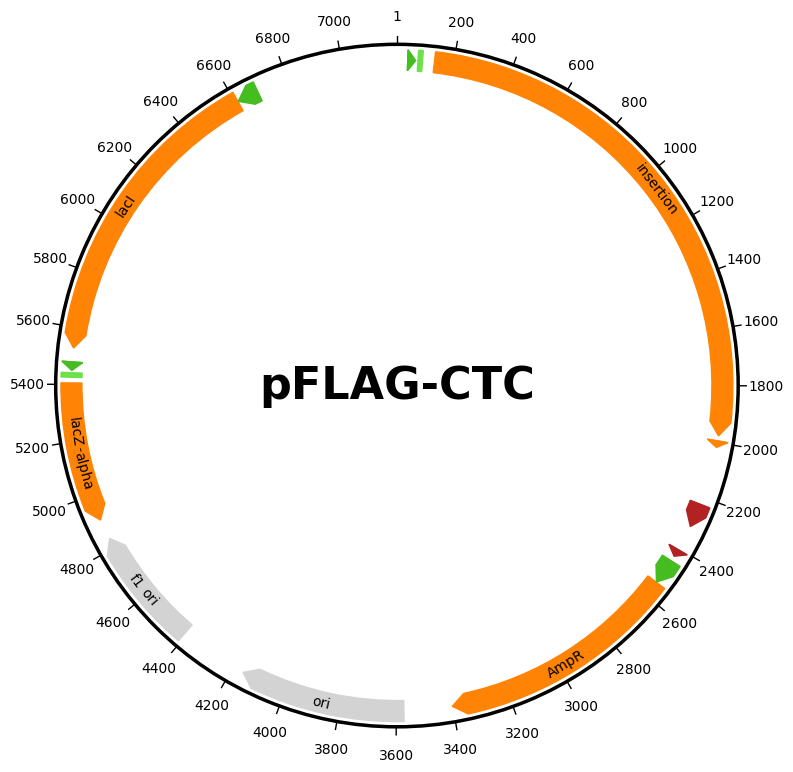

In [14]:
fig = plt.figure(figsize=(8.0, 8.0))
ax = fig.add_subplot(111, projection="polar")
graphics.plot_plasmid_map(
    ax,
    annotation,
    plasmid_size=len(seq) + len(insertion),
    label="pFLAG-CTC",
    feature_formatter=custom_feature_formatter,
)
fig.tight_layout()
plt.show()

(<Axes: >,
 ({GF(lacI, 5528-6610 (-1)): 0,
   GF(lacIq promoter, 6611-6688 (-1)): 0,
   GF(lac promoter, 5449-5479 (-1)): 0,
   GF(lac operator2, 5425-5441 (-1)): 0,
   GF(lacZ_alpha, 4908-5405 (-1)): 0,
   GF(AmpR, 2542-3402 (1)): 0,
   GF(AmpR promoter, 2450-2541 (1)): 0,
   GF(FLAG, 1995-2018 (1)): 0,
   GF(lac operator, 75-91 (1)): 0,
   GF(tac promoter, 39-67 (1)): 0,
   GF(ori, 3573-4161 (1)): 0,
   GF(f1 ori, 4408-4836 (1)): 0,
   GF(insertion, 132-1977 (1)): 0},
  {GF(lacZ_alpha, 4908-5405 (-1)): {'feature_y': 0, 'annotation_y': 3.0},
   GF(f1 ori, 4408-4836 (1)): {'feature_y': 0, 'annotation_y': 1.0},
   GF(AmpR promoter, 2450-2541 (1)): {'feature_y': 0, 'annotation_y': 1.0},
   GF(lacIq promoter, 6611-6688 (-1)): {'feature_y': 0, 'annotation_y': 1.0},
   GF(lac promoter, 5449-5479 (-1)): {'feature_y': 0, 'annotation_y': 2.0},
   GF(tac promoter, 39-67 (1)): {'feature_y': 0, 'annotation_y': 1.0},
   GF(FLAG, 1995-2018 (1)): {'feature_y': 0, 'annotation_y': 2.0},
   GF(lac oper

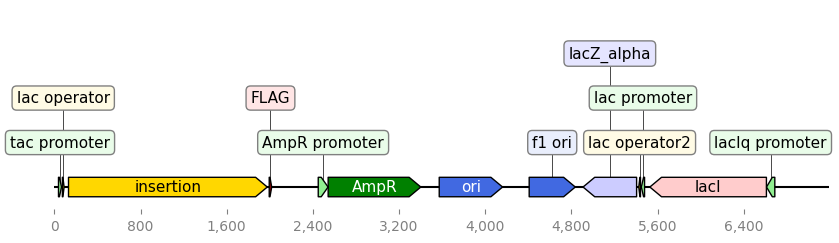

In [15]:
features=[
    GraphicFeature(start=3683 + len(insertion), end=4765 + len(insertion), strand=-1, color="#ffcccc", label="lacI"),
    GraphicFeature(start=4766 + len(insertion), end=4843 + len(insertion), strand=-1, color="lightgreen", label="lacIq promoter"),
    GraphicFeature(start=3604 + len(insertion), end=3634 + len(insertion), strand=-1, color="lightgreen", label="lac promoter"),
    GraphicFeature(start=3580 + len(insertion), end=3596 + len(insertion), strand=-1, color="#ffd700", label="lac operator2"),
    GraphicFeature(start=3063 + len(insertion), end=3560 + len(insertion), strand=-1, color="#ccccff", label="lacZ_alpha"),
    GraphicFeature(start=697 + len(insertion), end=1557 + len(insertion), strand=+1, color="green", label="AmpR"),
    GraphicFeature(start=605 + len(insertion), end=696 + len(insertion), strand=+1, color="lightgreen", label="AmpR promoter"),
    GraphicFeature(start=150 + len(insertion), end=173 + len(insertion), strand=+1, color="darkred", label="FLAG"),
    GraphicFeature(start=75, end=91, strand=+1, color="#ffd700", label="lac operator"),
    GraphicFeature(start=39, end=67, strand=+1, color="lightgreen", label="tac promoter"),
    GraphicFeature(start=1728 + len(insertion), end=2316 + len(insertion), strand=+1, color="royalblue", label="ori"),
    GraphicFeature(start=2563 + len(insertion), end=2991 + len(insertion), strand=+1, color="royalblue", label="f1 ori"),
    GraphicFeature(start=mcs_start_coord + len(option.start2insertion), end=mcs_start_coord + len(option.start2insertion) + len(insertion), 
                   strand=+1, color="gold", label="insertion")
]
record = GraphicRecord(sequence_length=len(seq)+len(insertion), features=features)
record.plot(figure_width=10)